# Data Science for Beginners - Part 2
Now that you have your environment running, we can do some stuff. We'll use this dataset:

[*2015 Flight Delays and Cancellations* provided by the U.S. Department of Transportation](https://www.kaggle.com/usdot/flight-delays). 

It is best to follow along with a running Jupyter environment - this can be local or on Azure Notebooks. It is also best to be running this on a cloned repo or library so that you'll also have the data accessible. 

**Note:** if on Azure notebooks - you would probably need to use a subset of the data because `flights.csv` may be too large for Azure to handle. In *Section 2*, run the other cell.

# 1. Import Modules and Data

In [2]:
%matplotlib inline

import pandas as pd # Panel data processing
import numpy as np # Library for numerical data
import matplotlib.pyplot as plt # Plots
import matplotlib 

# 2. Read Data from File

**We host this data on an S3 bucket, so it can take a while to download. You can choose to just download the file yourself and change the path.**

First we load our csv with `pd.read_csv()`, which is a very good csv parser. This returns a pandas `DataFrame` object, of which dimensions are accessible with `.shape`. 

`.head()` gives us a preview of our data- by showing the first 5 rows. 

In jupyter notebook, any variable called on the last line is automatically printed, so there's no need to call `print(flights.head())`.

### FOR LOCAL/Other

In [3]:
flights = pd.read_csv('flights.csv') 
# https://s3.amazonaws.com/vandyhacks/datascience/flights/flights.csv
# Load the csv from our s3 bucket
# This might take a while since the file is about 500mb big (in future just download onto computer)

print("Dimensions: {r} rows, {c} cols".format(r=flights.shape[0], c=flights.shape[1])) 
flights.head()

C:\Users\kenny\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dimensions: 5819079 rows, 31 cols


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## ALL notebooks run from here down

In [23]:
airlines = pd.read_csv('https://s3.amazonaws.com/vandyhacks/datascience/flights/airlines.csv')
airlines.head() 

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


# 3. Remove Columns with Empty Values

In [4]:
flights = flights.dropna(axis=1, thresh= 0.8 * flights.shape[0]) # Drop any columns containing NaN, but keep columns with at least 80% non-NA values

print("Dimensions: {r} rows, {c} cols".format(r=flights.shape[0], c=flights.shape[1]))
flights.head()

Dimensions: 5819079 rows, 25 cols


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


# 4. Add 'DATE' and 'TOTAL_DELAY' Columns

In pandas, you can simply make a new column with assignment. For example:

```
df['a'] = df['b'] + df['c']
```
For every row of a DataFrame `df`, the value in col 'a' is the sum of values in columns 'b' and 'c' on the same row.

Also, you can access columns of a DataFrame like such. Autocomplete with tab works pretty well in Jupyter.

A `DateTime` object is another pandas object for holding date-time information. The `to_datetime` function is pretty flexible in converting Series, strings, and other items into DateTime objects.


The next piece of code is pretty nutty:

```flights.groupby('DATE').mean()``` returns a new DataFrame. This aggregates the entire `flights` DataFrame column-wise by taking the mean of each column grouped by matching values in the 'DATE' column. The grouped 'DATE' column is now the new index.

```pd.DataFrame(flights.groupby('DATE').mean(), columns=['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY'])``` creates a DataFrame by basically subsetting the columns we specify. We can also do this by subsetting with a list:

```new_df = flights.groupby('DATE').mean()[['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY']]``` 

In [ ]:
# todo: make our column DATE that is a DateTime series,
#      get average Departure_delay, arrival_delay, and total_delay grouped by Day

# More on data manipulation

**What are some insights we want? How do we change our data to get them?**

In [7]:
flights.shape

(5819079, 25)

(array([2.099756e+06, 2.178202e+06, 8.304700e+05, 3.526040e+05,
        2.168350e+05, 2.945700e+04, 3.630000e+03, 1.872000e+03,
        8.120000e+02, 3.700000e+02]),
 array([  7. ,  75.3, 143.6, 211.9, 280.2, 348.5, 416.8, 485.1, 553.4,
        621.7, 690. ]),
 <a list of 10 Patch objects>)

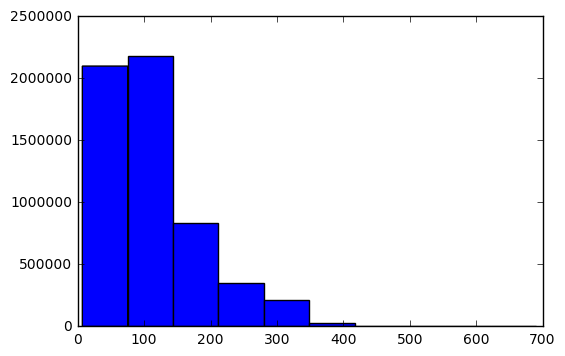

In [15]:
plt.hist(flights['AIR_TIME'].dropna())